# **DS862 - Final Project**

2020-12-13
*   Aditya Tamhankar
*   Chisako Tani
*   Claire Vu





## **1 - Introduction**

**Topic:** Identifying key environmental issues and the degree of measures taken by various regions

**Goal:** The goal of this project is to identify key environmental issues and how each region deal with them (ie. plans to reduce city-wide emissions, enhance water security, etc.) with the help of data mining, visualizations and clustering techniques.

**Motivation**: This topic is inspired by an Kaggle competition hosted by CDP called[ “Unlocking Climate Solution: City-Business Collaboration for a Sustainable Future”](https://www.kaggle.com/c/cdp-unlocking-climate-solutions/overview). We picked this topic because not only do we want to challenge ourselves in a real-life data contest, but it also is our chance to work on a meaningful project that would help make positive environmental impacts. 

**Overview of CDP**: [CDP](https://www.cdp.net/en) is a non-profit organization that researches and manages environmental action globally for investors, companies and cities. CDP has the world's largest and most comprehensive data based on environmental action, which is constantly updated through its annual survey of companies and cities around the world on how they are addressing environmental issues. Using this data, they ran an analytics competition on kaggle from October to December of this year.

**Structure of the Questionnaire by CDP:** The questionnaire by CDP is in the format shown in the PDF below. Some questions are multiple choice, some are open-ended, and some have a table with choices and text fields for each question.

In the case of multiple-choice questions, the answers are simply stored in the "Response Answer" column of the csv. In the case of a question with an answer table, the "Question Number", "Column Number", and "Row Number" can be used to identify which question and which table is answered.

<img src="question.png">

## **2 - About the Data**

CDP has released the following data based on three different surveys: 1) corporate climate change disclosures, 2) corporate water security disclosures, and 3) disclosures from cities. These data are available for the years 2018-2020, for a total of nine files.

For this project, we decided to use the data from cities because we wanted to know if there were differences in the way different regions and countries dealt with environmental issues. A secondary reason was that the data published by CDP is huge, several hundred megabytes per file, and we needed to narrow down the scope of the project to be realistic.

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('2019_Full_Cities_Dataset.csv') 
questions = pd.read_csv('2019_Questions_Summary.csv')
questions

,Unnamed: 0,Question Number,Question Name,Question Category 1,Question Category 2,Question Type,Sequential?,Can be used for Project?
0,424.0,0.1,Please give a general description and introduc...,Introduction,Introduction,With Table,No,NaN
1,1451.0,0.2,If you have not previously submitted your Lett...,Introduction,Introduction,Not in PDF,-,NaN
2,111.0,0.3,Please provide information about your city’s M...,Introduction,Introduction,With Table,No,NaN
3,265.0,0.4,Please select the currency used for all financ...,Introduction,Introduction,With Table,No,NaN
4,163.0,0.5,Please provide details of your city’s current ...,Introduction,Introduction,With Table,No,NaN
...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


"2019_Questions_Summary.csv" is our own data to organize the questions listed in the PDF, including question number and question content, category, question type, whether it is a follow-up question or not, and whether it can be used for our analysis (marked with '*').

In [3]:
data.head(3)

,Questionnaire,Year Reported to CDP,Account Number,Organization,Country,CDP Region,Parent Section,Section,Question Number,Question Name,Column Number,Column Name,Row Number,Row Name,Response Answer,Comments,File Name,Last update
0,Cities 2019,2019,54113,City of Flagstaff,United States of America,North America,NaN,Energy,8.0a,Please provide details of your renewable energ...,2,Energy / electricity types covered by target,3,NaN,Other: Proportion of community electricity use...,NaN,NaN,24/06/2020 05:30:36 AM
1,Cities 2019,2019,35894,Ville de Montreal,Canada,North America,Emissions Reduction,Mitigation Actions,5.4,Describe the anticipated outcomes of the most ...,9,Co-benefit area,1,NaN,NaN,source: http://ville.montreal.qc.ca/pls/portal...,NaN,24/06/2020 05:30:36 AM
2,Cities 2019,2019,44185,Suwon City,Republic of Korea,East Asia,Emissions Reduction,Mitigation Target setting,5.0a,Please provide details of your total city-wide...,3,Boundary of target relative to city boundary (...,1,NaN,Same – covers entire city and nothing else,NaN,NaN,24/06/2020 05:30:36 AM


In [4]:
print(data.shape)
print(data.groupby(['CDP Region'])['CDP Region'].nunique().sum())
print(data.groupby(['Country']).Country.nunique().sum())
print(data.groupby(['Organization']).Organization.nunique().sum())
print(data.groupby(['Parent Section'])['Parent Section'].nunique().sum())
print(data.groupby(['Section']).Section.nunique().sum())
print(data.groupby(['Question Number'])['Question Number'].nunique().sum())

(486349, 18)
8
93
814
9
29
157


As indicated above, the survey covered 8 areas of the world, 93 countries, and 814 cities responded. Also, there are 157 questions, each of which is divided into 9 categories and 29 subcategories.

## **3 - Exploratory Analysis**

In this section, we will explore the data and each region's approach to environmental issues through charts.

Since there are 157 questions included in the data, we decided to use Tableau for visualization. For the analysis, we used the same csv that was loaded above. Among the charts drawn for each question, we will pick up the charts that show differences by region, especially for each question category.

The following graph shows the breakdown by region of the 814 cities that participated in the survey. It can be seen that cities in Latin America responded particularly well, and cities in Asia responded less.

Because of the variation in the number of participants in each region, we will use percentages in the visualization that follows.



In [5]:
%%HTML
<div class='tableauPlaceholder' id='viz1607842002943' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Respondents&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book3_16078417496350&#47;Respondents' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Respondents&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1607842002943');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.40)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### 3.1 - Governance & Data Management
As you can clearly see, the majority of cities answered "Yes". However, in Latin America and the Middle East, the percentage of "Yes" responses was lower than in other regions.

In [6]:
%%HTML
<div class='tableauPlaceholder' id='viz1607849103418' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q1_0&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book3_16078417496350&#47;Q1_0' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q1_0&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1607849103418');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.40)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Here, Africa and South and West Asia have different characteristics from the others. In Africa, adaptation targets ranked first, while in South and West Asia, waste management ranked first.

In [7]:
%%HTML
<div class='tableauPlaceholder' id='viz1607842855512' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q1_0a&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book3_16078417496350&#47;Q1_0a' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q1_0a&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1607842855512');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.60)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

As for the tools used, Excel still accounts for a large percentage, indicating that a unified tool or methodology is not widespread.

In [8]:
%%HTML
<div class='tableauPlaceholder' id='viz1607849331694' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q1_12&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book3_16078417496350&#47;Q1_12' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q1_12&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1607849331694');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.40)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### 3.2 - Climate Hazards and Vulnerability
What is interesting about this graph is that the disincentives for environmental initiatives vary greatly by region. For example, poverty is a major factor in Africa, while rapid urbanization is a challenge in South and West Asia, and budgetary issues are a major factor in North America and Europe.

In [9]:
%%HTML
<div class='tableauPlaceholder' id='viz1607908010543' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q2_2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book3_16078417496350&#47;Q2_2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q2_2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1607908010543');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.60)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### 3.3 - Adaption
The percentage of "Yes" responses was lower in Latin America and South and West Asia. When "Intending" and "In progress" are included, it is clear that almost all regions have a plan for climate change. The percentage of respondents who answered "Do know know" was higher in Latin America.

In [10]:
%%HTML
<div class='tableauPlaceholder' id='viz1607850892939' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q3_1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book3_16078417496350&#47;Q3_1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q3_1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1607850892939');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.40)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### 3.4 - City-wide Emissions
The percentage of "Yes" responses is high in East Asia, Europe, North America, Southeast Asia and Oceania, while it is significantly low in Africa. It is assumed that there is a difference depending on the level of development of the country or region, since a certain level of technology is required to grasp the emission.

In [11]:
%%HTML
<div class='tableauPlaceholder' id='viz1607851020904' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;4D&#47;4DC5Y86H3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;4DC5Y86H3' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;4D&#47;4DC5Y86H3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1607851020904');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.40)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In the previous question, there was a clear difference in the regions that capture emissions, but it is very interesting that there is no clear difference in the increase and decrease. It can be inferred that it is important not only to capture emissions but also to take specific measures.

In [12]:
%%HTML
<div class='tableauPlaceholder' id='viz1607853646141' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q4_8&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book3_16078417496350&#47;Q4_8' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q4_8&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1607853646141');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.40)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### 3.5 - Emissions Reduction
The next two questions show the same trend as Q4.0, indicating that there are differences among regions in terms of emission reduction measures.

In [13]:
%%HTML
<div class='tableauPlaceholder' id='viz1607853731643' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q5_0&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book3_16078417496350&#47;Q5_0' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q5_0&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1607853731643');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.60)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [14]:
%%HTML
<div class='tableauPlaceholder' id='viz1607853815428' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q5_5&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book3_16078417496350&#47;Q5_5' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q5_5&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1607853815428');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.40)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### 3.6 - Opportunities
As with Q2.2, the results vary greatly by region. Looking at the overall results, it is clear that there is a particularly high level of interest in Renewable Energy.

In [15]:
%%HTML
<div class='tableauPlaceholder' id='viz1607854088426' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q6_2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book3_16078417496350&#47;Q6_2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q6_2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1607854088426');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.60)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### 3.7 - Energy
The percentage of respondents who answered "Yes" in Latin America and Africa was low.

In [16]:
%%HTML
<div class='tableauPlaceholder' id='viz1607854188080' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q8_0&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book3_16078417496350&#47;Q8_0' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q8_0&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1607854188080');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.40)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### 3.8 - Waste
Africa, which ranked high in terms of waste management in Q6.2, has not made much progress in introducing restriction policies. Asia and Latin America, which were also ranked high, seem to have made some progress in regulation. Although it is not possible to tell from this, the fact that 100% of the Middle East respondents answered "No" seems to indicate that there is a reason for this.

In [17]:
%%HTML
<div class='tableauPlaceholder' id='viz1607854295258' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q13_6&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book3_16078417496350&#47;Q13_6' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q13_6&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1607854295258');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.45)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### 3.9 - Water security
The percentage of "Yes" is very high in almost all regions except Europe. In fact, in Q6.2, water issues were ranked lower in Europe. In particular, in Q14.3a, "Increased water stress" appears to be a risk regardless of region. Furthermore, in Africa and other regions, infrastructure issues are also a concern, indicating that we should pay attention to issues other than water quality and supply sources.

In [18]:
%%HTML
<div class='tableauPlaceholder' id='viz1607854385635' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q14_3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book3_16078417496350&#47;Q14_3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q14_3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1607854385635');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.45)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [19]:
%%HTML
<div class='tableauPlaceholder' id='viz1607854419545' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q14_3a&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book3_16078417496350&#47;Q14_3a' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book3_16078417496350&#47;Q14_3a&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1607854419545');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.60)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### 4.0 - Summary
Q1.0, Q3.1, Q5.5, and Q14.3 show that regardless of region, respondents are highly concerned about environmental issues such as emissions and water security. On the other hand, there are differences in the degree to which the issues are being addressed, depending on the region. In particular, as shown in Q4.0 and Q5.0, Africa, Latin America, the Middle East, and South and West Asia were often characterized differently from other regions. Although more data is needed to confirm this, it can be seen that there is a difference between regions that include many developing countries and those that do not.

## **4 - Data Cleaning & Preparation**

In this section, we preprocess our data for our clustering analysis in the following sections. We first extract questions that can be used for project, then assign unique question numbers to them, put respondents and answers into a pivot table form (row: responsdent, columns: answers for each questions), and fill out NaN values.

In [20]:
# Extract rows that match the question we use
data = data[data['Question Number'].isin(questions[questions['Can be used for Project?'] == '*']['Question Number'])]

In [21]:
# Drop unnecessary columns & NaN in Response Answer
data.drop(['Questionnaire', 'Year Reported to CDP', 'Question Name', 'Column Number', 'Column Name', 'Row Number', 'Row Name', 'Comments', 'File Name', 'Last update'], inplace=True, axis=1)
data.dropna(subset=['Response Answer'], inplace=True)

In [22]:
# Check the number of rows
data.shape

(14960, 8)

In [23]:
# Check the number of rows by region
data.groupby('CDP Region').count()

,Account Number,Organization,Country,Parent Section,Section,Question Number,Response Answer
CDP Region,,,,,,,
Africa,1090,1090,1090,818,1090,1090,1090
East Asia,410,410,410,295,410,410,410
Europe,3212,3212,3212,2399,3212,3212,3212
Latin America,4423,4423,4423,3442,4423,4423,4423
Middle East,177,177,177,119,177,177,177
North America,3813,3813,3813,2887,3813,3813,3813
South and West Asia,386,386,386,275,386,386,386
Southeast Asia and Oceania,1449,1449,1449,1073,1449,1449,1449


If respondent chooses option "Other", they can add their own comments. However, since this project does not focus on Natural Language Processing, we cut out the extra comments next to "Other:" to make the data less complicated, turning "Other" into a choice that is consistent across questions.

In [24]:
# Replace responces starts with "Other: ~~"
data.loc[data['Response Answer'].str.startswith('Other'), "Response Answer"] = "Other"

In [25]:
# Extract question numbers
q_use_mc = questions[(questions['Can be used for Project?'] == '*') & (questions['Question Type'] == 'Simple Multiple Choice')]
q_use_sata = questions[(questions['Can be used for Project?'] == '*') & (questions['Question Type'] == 'Select-all-that-apply')]
q_use_num = questions[(questions['Can be used for Project?'] == '*') & (questions['Question Type'] == 'Numerical')]

In the case of a question that requires the user to select all the applicable items, the answers are divided into two or more rows when multiple items are selected, resulting in duplication of keys when pivoting. Therefore, we decided to consider a question as a "Yes-No" question and assign a unique number corresponding to each choice.

e.g., 10.0 -> 10.0_1

In [26]:
new_sata_qn = []
for qn in q_use_sata['Question Number']:

  # Create response options list
  options = data[data['Question Number'] == qn]['Response Answer'].drop_duplicates().reset_index().drop(['index'], axis=1).to_dict()
  for key, option in options['Response Answer'].items():
    new_qn = str(qn)+"_"+str(key+1)

    # If there is an option that no one choose, skip adding the new question number list
    if len(data[(data['Question Number'] == qn) & (data['Response Answer'] == option)]) != 0:
      new_sata_qn.append(new_qn)

    # Assign the new question number
    data.loc[(data['Question Number'] == qn) & (data['Response Answer'] == option),  "Question Number"] = new_qn

data.head()

,Account Number,Organization,Country,CDP Region,Parent Section,Section,Question Number,Response Answer
71,60621,Lilongwe City Council,Malawi,Africa,NaN,Transport,10.0_1,Passenger transport
114,35887,Ajuntament de Valencia,Spain,Europe,Governance and Data Management,Governance,1.0,Yes
135,54277,New Plymouth District Council,New Zealand,Southeast Asia and Oceania,NaN,Energy,8.0,Not intending to undertake
185,50672,Município de Santarém,Portugal,Europe,NaN,Transport,10.7,No
241,60638,Walvis Bay Municipality,Namibia,Africa,Local Government Emissions,Local Government Operations GHG Emissions Data,7.0,Yes


In [27]:
#Turn data into pivot table form:
data_pivoted = data.pivot(index=['Account Number', 'Organization', 'Country', 'CDP Region'], columns=['Question Number'], values=['Response Answer'])

In [28]:
# Reset index and column names
data_pivoted.reset_index(inplace=True)
data_pivoted.columns = list(data.columns[:4]) +  [col[1] for col in data_pivoted.columns][4:]

In [29]:
# Check NaN
data_pivoted[q_use_num['Question Number']].isna().sum()

1.9     730
6.11    769
8.4     748
10.4    774
11.0    743
11.1    759
12.0    543
12.1    771
12.2    777
12.3    779
13.1    744
13.2    749
14.2    258
dtype: int64

We decided to not use numerical questions as 90% of their answers are NaN, which would give us little to no information.

In [30]:
# Replace the answers of select-all-that-apply questions to Yes-No
for qn in new_sata_qn:
  data_pivoted.loc[~(data_pivoted[qn].isnull()), qn] = "Yes"
  data_pivoted.loc[data_pivoted[qn].isnull(), qn] = "No"

# Fill all other NaN with 'No' for categorical
data_pivoted[q_use_mc['Question Number']] = data_pivoted[q_use_mc['Question Number']].fillna('No')
data_pivoted.drop(q_use_num['Question Number'], axis=1, inplace=True)

data_pivoted.head()

,Account Number,Organization,Country,CDP Region,1.0,1.1,1.12_1,1.12_2,1.12_3,1.12_4,...,6.1,6.3,6.4,6.6,6.9,7.0,8.0,8.1,8.6,9.3
0,1093,City of Atlanta,United States of America,North America,Yes,Yes,No,No,No,No,...,Yes,No,No,No,No,In progress,Yes,No,Yes,No
1,1184,City of Austin,United States of America,North America,Yes,Yes,Yes,Yes,Yes,No,...,Yes,No,Yes,Do not know,Yes,Yes,Yes,Yes,Yes,Yes - it applies to both new and existing buil...
2,1499,Ajuntament de Barcelona,Spain,Europe,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,No,No,No,Yes,Yes,Yes,Yes,Not intending to undertake,No
3,2028,City of Bonn,Germany,Europe,Yes,Yes,No,No,No,No,...,No,No,No,No,No,Yes,No,No,No,No
4,2185,Bristol City Council,United Kingdom of Great Britain and Northern I...,Europe,Yes,Yes,No,No,No,No,...,Yes,No,No,No,No,Yes,Yes,No,Yes,No


## **5 - Hierarchical Clustering**

We have 46 usable questions for each city in which the answers are categorical. If we want to turn them into numerical there would be to > 100 features to use, which are too many for 810 observations. Additionally, since most of these questions ask about urban planning and environment, the chance that these questions are correlated is high. Thus, we decide to perform Multiple Correspondence Analysis on our question data. We choose this dimension reduction technique because our data is categorical. 

In [31]:
# ! pip install prince 

In [32]:
import prince #import prince for MCA 

After the installation for Prince library is done, we can instantiate MCA. Because we will use unsupervised learning (clustering) in this project, we cannot tune MCA hyperparameters using cross validation and GridSearch/RandomizedSearch. Instead, since we want to visualize clusters, we opt for 2 components that will be used as x-axis and y-axis in cluster plots later. In the [Prince library](https://github.com/MaxHalford/prince), they also mention n_components = 2 is enough if users want to use chart. 

In [33]:
#Instantiate MCA
mca = prince.MCA(
     n_components=2,
     random_state=862
)

X = data_pivoted.iloc[:,4:] #X is the question data for all cities 
mcaX = mca.fit_transform(X) #Perform MCA on X

In [34]:
#Print out explained inertia to see how much data information the new mcaX can cover 
print(mca.explained_inertia_)

[0.10194854668554369, 0.054399422277410854]


Only ~15% of the inertia the 2 components can contribute, which is low. However, we still want to test if these 2 components are really not that helpful by using them for clustering. For hierarchical clustering, first we decide the number of clusters using a dendrogram.

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

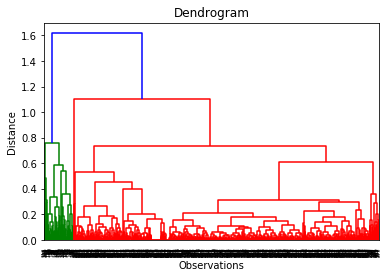

In [36]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(mcaX, method = 'average'))
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()

The dendogram tells us to go for 2 clusters, which are probably just the left and the right blobs of data. To see if a bigger number performs better, we'll also try 3 clusters. When instantiating AgglomerativeClutering, we are using 'cosine' affinity and 'average' linkage. Since the original data is categorical and text, Euclidean might not be able to capture the relationships between observations as well as cosine, thus we cannot use 'ward' linkage ('ward' can only be used for Euclidean).

In [37]:
from sklearn.cluster import AgglomerativeClustering

AC2 = AgglomerativeClustering(n_clusters = 2, affinity='cosine',linkage='average') 
AC2.fit(mcaX)

AC3 = AgglomerativeClustering(n_clusters = 3, affinity='cosine',linkage='average') 
AC3.fit(mcaX)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

Let's print out the number of observations that belong to each cluster to compare the difference between 2 and 3 clusters:

In [38]:
import collections
print(collections.Counter(AC2.fit_predict(mcaX)))
print(collections.Counter(AC3.fit_predict(mcaX)))

Counter({0: 564, 1: 246})
Counter({0: 468, 1: 246, 2: 96})


When we use 3 clusters, observations with label 1 using AC2 still stay in the same group, which is pretty impressive. On the other hand, 93 observations leave label 0 to form their own group, label 2. Now, let's visualize the clusters to decide which number of clusters performs better.

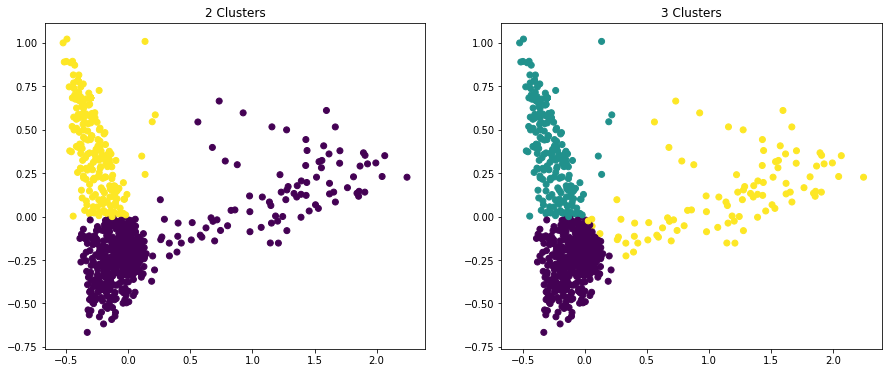

In [39]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.scatter(mcaX.iloc[:,0], mcaX.iloc[:,1], c = AC2.labels_)
plt.title('2 Clusters')

plt.subplot(122)
plt.scatter(mcaX.iloc[:,0], mcaX.iloc[:,1], c = AC3.labels_)
plt.title('3 Clusters')

plt.show()

Even though we were afraid that the 2 components wouldn't help much with 
clustering, the results are decent! It is clear that AC3 outperforms AC2 as it is able to detect the "yellow" group where observations stay far from each other. AC2 couldn't do that, instead it mixes the "yellow" group with "purple" observations. Now let's store these labels for later use:

In [40]:
AClabels = list(AC3.labels_)
data_pivoted['AC_labels'] = AClabels

## **6 - K-means Clustering**

We decided to use K-means clustering as an additional method to validate the results we see from the Hirarchical clustering. As there is no particular response variable. We will be using inertial and silhouette score to find out what is the optimum number of clusters we could use.

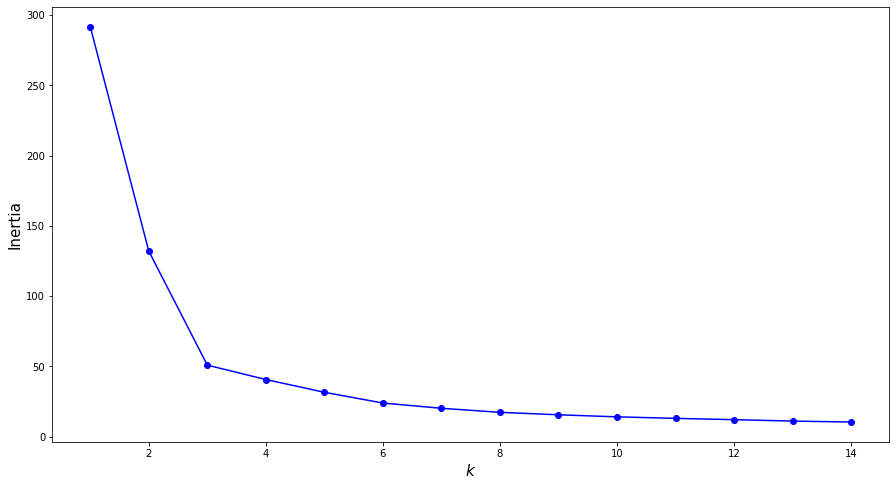

In [41]:
# Find best K
from sklearn.cluster import KMeans

# Fit the models with MCA transformed data
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(mcaX)
                for k in range(1, 15)]

# Extract the inertia for each model
inertias = [model.inertia_ for model in kmeans_per_k]

# Plot the inertia
plt.figure(figsize=(15, 8))
plt.plot(range(1, 15), inertias, "bo-")
plt.xlabel("$k$", fontsize=15)
plt.ylabel("Inertia", fontsize=15)

plt.show()

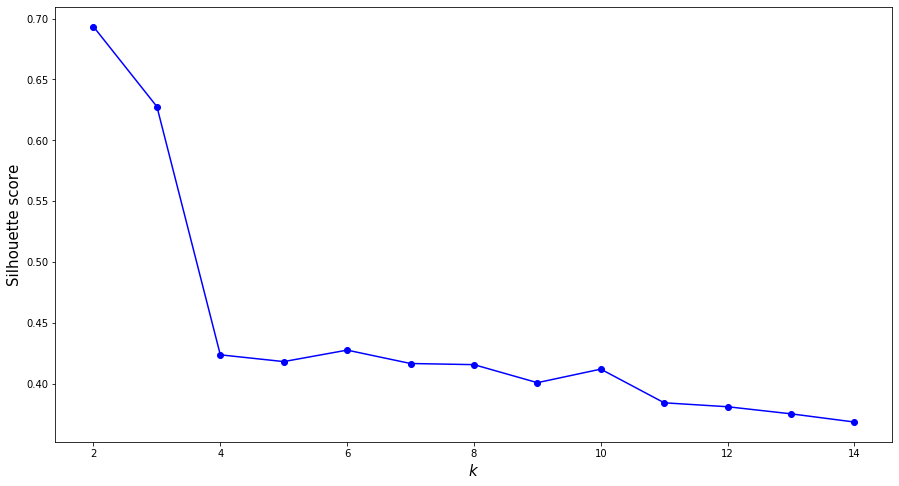

In [42]:
# Import
from sklearn.metrics import silhouette_score

# Get the Silhouette scores 
silhouette_scores = [silhouette_score(mcaX, model.labels_)
                     for model in kmeans_per_k[1:]]


plt.figure(figsize=(15, 8))

plt.plot(range(2, 15), silhouette_scores, "bo-")

plt.xlabel("$k$", fontsize=15)
plt.ylabel("Silhouette score", fontsize=15)

plt.show()

Selecting 3 clusters based on inertia and silhouette score.

In [43]:
# Set up the parameters for K-means
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=500, n_init=50, random_state=42)

labels = kmeans.fit_predict(mcaX)

# Check the distribution of labels
print(labels)

labels = pd.DataFrame(labels, columns=['Kmeans_Label'])

[0 1 1 2 0 0 1 1 1 1 0 0 1 2 1 1 0 1 1 0 1 1 0 2 0 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 2 0 0 0 0 2 0 0 0 0 2 1 1 0 0 0 1 1 0 2 1 1
 1 2 1 1 0 0 1 0 0 2 0 1 0 1 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 2
 0 1 0 1 0 0 0 0 0 2 0 0 0 0 0 2 0 0 1 0 0 1 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 2 1 2 0 0 2 0 0 2 0 0 2 0 0 0 2 0 0 0 2 0 0 0 0 2 0 0 0 2 0 2 2 0
 0 2 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 2 1
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 2 0 2 1 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2
 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 2 0 0
 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 2 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 2 0 0 0 0 0
 0 2 0 2 0 0 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 

Text(0.5, 1.0, '3 Clusters')

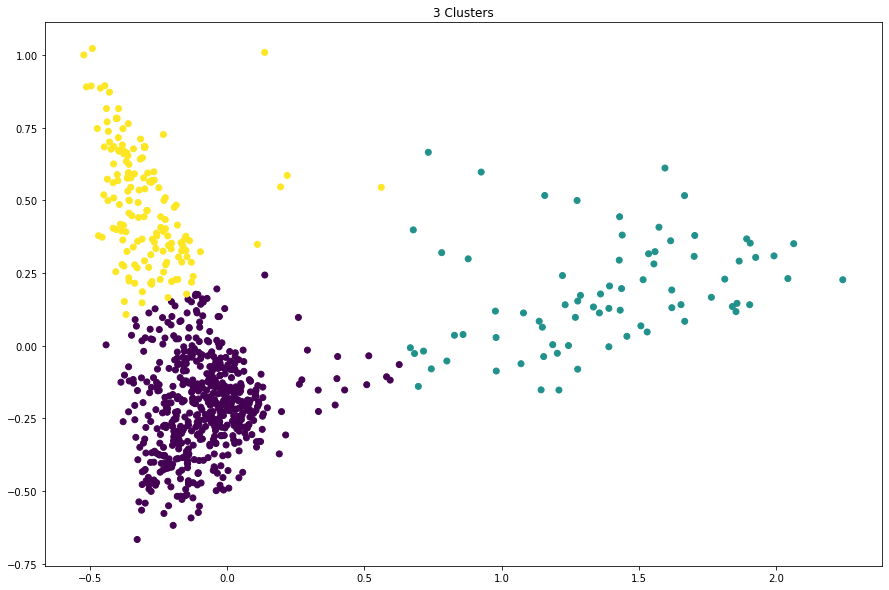

In [44]:
# Visualizing the clusters
plt.figure(figsize=(15, 10))

plt.scatter(mcaX.iloc[:,0], mcaX.iloc[:,1], c = kmeans.labels_)
plt.title('3 Clusters')

In [45]:
# Concat the labels with the data
new_data = pd.concat([data_pivoted, labels], axis = 1)
new_data

,Account Number,Organization,Country,CDP Region,1.0,1.1,1.12_1,1.12_2,1.12_3,1.12_4,...,6.4,6.6,6.9,7.0,8.0,8.1,8.6,9.3,AC_labels,Kmeans_Label
0,1093,City of Atlanta,United States of America,North America,Yes,Yes,No,No,No,No,...,No,No,No,In progress,Yes,No,Yes,No,0,0
1,1184,City of Austin,United States of America,North America,Yes,Yes,Yes,Yes,Yes,No,...,Yes,Do not know,Yes,Yes,Yes,Yes,Yes,Yes - it applies to both new and existing buil...,2,1
2,1499,Ajuntament de Barcelona,Spain,Europe,Yes,Yes,Yes,Yes,Yes,Yes,...,No,No,Yes,Yes,Yes,Yes,Not intending to undertake,No,2,1
3,2028,City of Bonn,Germany,Europe,Yes,Yes,No,No,No,No,...,No,No,No,Yes,No,No,No,No,1,2
4,2185,Bristol City Council,United Kingdom of Great Britain and Northern I...,Europe,Yes,Yes,No,No,No,No,...,No,No,No,Yes,Yes,No,Yes,No,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,841154,Municipalidad de Independencia (Peru),Peru,Latin America,Intending to incorporate in the next 2 years,In progress,No,No,No,No,...,No,No,No,Intending to undertake in the next 2 years,Do not know,No,Do not know,No,0,0
806,841155,Municipalidad de Tarapoto,Peru,Latin America,Yes,Yes,No,No,No,No,...,No,No,No,Intending to undertake in the next 2 years,In progress,No,Do not know,No,0,0
807,841269,Municipalidad de Montecarlo,Argentina,Latin America,Intending to incorporate in the next 2 years,Yes,No,No,No,No,...,No,No,No,Yes,No,No,No,No,1,2
808,841326,Municipalidad de Oro Verde,Argentina,Latin America,Do not know,Yes,No,No,No,No,...,No,No,No,Yes,No,No,No,No,1,2


In [46]:
# Check the distribution over different regions
group_by_labels = new_data.groupby(['Kmeans_Label','CDP Region']).size()
group_by_labels

Kmeans_Label  CDP Region                
0             Africa                         31
              East Asia                      11
              Europe                        118
              Latin America                 168
              Middle East                     3
              North America                 153
              South and West Asia             9
              Southeast Asia and Oceania     52
1             Africa                         11
              East Asia                       4
              Europe                         18
              Latin America                  10
              Middle East                     2
              North America                  19
              South and West Asia             4
              Southeast Asia and Oceania      8
2             Africa                          6
              East Asia                       3
              Europe                         35
              Latin America                 108

In [47]:
# Check the distribution over the rest of the data.
data_label_pivot = pd.pivot_table(new_data, index=["CDP Region"], columns=["Kmeans_Label"], aggfunc=lambda x: len(x.unique()))
data_label_pivot

1.0       1.1       1.12_1       1.12_2  ...  \
Kmeans_Label                 0  1  2   0  1  2      0  1  2      0  ...   
CDP Region                                                          ...   
Africa                       4  1  2   4  1  1      1  2  1      2  ...   
East Asia                    1  1  2   1  1  2      1  2  1      1  ...   
Europe                       6  3  4   5  3  4      1  2  2      2  ...   
Latin America                6  2  5   6  2  5      1  2  1      1  ...   
Middle East                  2  1  2   2  1  1      1  2  1      2  ...   
North America                6  2  4   5  1  3      2  2  1      2  ...   
South and West Asia          3  2  2   4  2  2      1  1  1      2  ...   
Southeast Asia and Oceania   6  1  2   5  2  2      1  2  1      2  ...   

                           AC_labels Account Number          Country          \
Kmeans_Label                       2              0   1    2       0   1   2   
CDP Region                                                                     
Africa                             1             31  11    6      19   8   6   
East Asia                          1             11   4    3       4   3   2   
Europe                             1            118  18   35      27  14  15   
Latin America                      2            168  10  108      14   6  10   
Middle East                        1              3   2    2       2   2   2   
North America                      1            153  19   25       2   2   2   
South and West Asia                1              9   4    2       3   1   1   
Southeast Asia and Oceania         1             52   8    8       7   7   3   

                           Organization           
Kmeans_Label                          0   1    2  
CDP Region                                        
Africa                               31  11    6  
East Asia                            11   4    3  
Europe                              118  18   35  
Latin America                       168  10  108  
Middle East                           3   2    2  
North America                       153  19   25  
South and West Asia                   9   4    2  
Southeast Asia and Oceania           52   8    8  

[8 rows x 150 columns]

In [48]:
print(collections.Counter(kmeans.fit_predict(mcaX))) #to see frequencies of each label

Counter({0: 545, 2: 189, 1: 76})


Looks like K-means' '1' label is actually Hierarchical's '2' label.

## **7 - Conclusion**

The Exploratory Analysis shows that climate change and water security are the environmental issues of particular concern. Regardless of the region, a large percentage of cities say they have a clear plan for climate change or that one is underway. However, not as many cities reported a decrease in emissions that contribute to climate change, suggesting that there is still room for improvement.

In terms of water security, all regions responded that it could be a risk. However, what is considered a risk differs from region to region, making it difficult to take uniform measures. In Africa and Southeast Asia and Oceania, drought was ranked as one of the top risks, suggesting the need to consider it in relation to climate change.

Now that we are done with clustering, the next step is to make sense out of the results. Usually, if the data is continuous or categorical that follows order (so we can ordinally encode the labels), we can use cluster's means to interpret the cluster labels. However, since our data is entirely categorical and do not necessarily follow any orders (even though some does - ie. 'Yes', 'No', 'In progress' questions), we pick out 3 questions about cities' plans for environmental issues in order to see how different groups respond to these questions. From this, we would accordingly intepret the labels. The 3 questions we selected are: 3.1 (plans for climate changes adaptation), 5.5 (plans for emission reduction), and 8.0 (usage of renewable energy). Since we initially choose Hierarchichal Clustering for our data, we will interpret AC's labels only. K-means labels follow a similar patterns as Agglomerate Clustering, hence we expect the intepretation to be the same.

In [49]:
new_data[(new_data['AC_labels'] == 0)][['5.5','3.1','8.0','AC_labels']]

,5.5,3.1,8.0,AC_labels
0,Yes,Yes,Yes,0
4,In progress,In progress,Yes,0
5,Yes,Intending to undertake in the next 2 years,Yes,0
11,In progress,In progress,Yes,0
16,Yes,In progress,Yes,0
...,...,...,...,...
802,Do not know,Do not know,Do not know,0
803,Intending to undertake in the next 2 years,Intending to undertake in the next 2 years,Do not know,0
804,Intending to undertake in the next 2 years,Intending to undertake in the next 2 years,Intending to undertake in the next 2 years,0
805,In progress,Intending to undertake in the next 2 years,Do not know,0


We can see that group 0 is a mix of 'In progress', 'Intending to undertake in the next 2 years' and 'Yes' when asked about plans for environmental issues. Thus, this group can be categorized as cities that are in the planning process or will launch their environment initiatives in the near future.

In [50]:
new_data[(new_data['AC_labels'] == 1)][['5.5','3.1','8.0','AC_labels']]

,5.5,3.1,8.0,AC_labels
3,No,Yes,No,1
10,Yes,Yes,Yes,1
13,Do not know,Intending to undertake in the next 2 years,No,1
19,Yes,Yes,No,1
23,No,Yes,No,1
...,...,...,...,...
794,Do not know,No,Do not know,1
796,No,Do not know,No,1
807,In progress,Intending to undertake in the next 2 years,No,1
808,Yes,Yes,No,1


In this group, there are more No when cities get asked about their plans for environmental changes or usage of renewable energy. This implies that this group is about cities that have little effort in tackling environmental issues.

In [51]:
new_data[(new_data['AC_labels'] == 2)][['5.5','3.1','8.0','AC_labels']]

,5.5,3.1,8.0,AC_labels
1,Yes,Yes,Yes,2
2,Yes,Yes,Yes,2
6,Yes,Yes,Yes,2
7,Yes,Yes,Yes,2
8,Yes,Yes,Yes,2
...,...,...,...,...
472,Yes,Yes,In progress,2
590,Yes,Yes,Yes,2
631,Yes,Yes,Yes,2
642,Yes,Yes,Yes,2


Lastly, we can see a lot of 'Yes' with some mix of 'In progress' or 'Intending to undertake in the next 2 years'. This indicates that this group are the most proactive group in which cities have already launched initiatives (or will launch soon) to deal with environmental challenges.

#### Reflections 

This project was a good learning experience as we could work on an on-going Kaggle competition data. This was a challenging task for all of us as the data provided was raw in nature. This gave us an opportunity to understand how to refine the available data and make the best out of it. Understanding the data and what needs to be done with it is key for any further analysis. From this project we learned how to lay the ground work for more sophesiticated analysis. We would like to continue working on it, given more time, to find what are the performance indicators of environmental issues from the CDP survey data.